**Libraries**

In [1]:
import pandas as pd
import numpy as np

import warnings

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *
import joypy #el de las densidades guays

from sklearn import manifold  


from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

import os 
cwd = os.getcwd() + "/"
#cwd="/home/angela/Notebook/machine_learning/normalizados/NN_simple_param/"
from sklearn import metrics

from sklearn.neural_network import MLPClassifier


warnings.filterwarnings('ignore') #ATENCION QUE ESTO CREO QUE FUNCIONA PARA TODO EL NOTEBOOK

import random
random.seed(1)
np.random.seed(1)
np.random.RandomState(1)

from sklearn.preprocessing import MinMaxScaler




**LOAD**

In [2]:
#ALL THE DATASET

df=pd.read_pickle("/home/angela/Notebook/data/normalizados/trainpickle")
df_originaltest=pd.read_pickle("/home/angela/Notebook/data/normalizados/testpickle")

In [3]:
#SIMPLe DATASET
#df=pd.read_pickle("/home/angela/Notebook/data/normalizados/trainsimplepickle")
#df_originaltest=pd.read_pickle("/home/angela/Notebook/data/normalizados/testsimplepickle")


# Machine learning

**We will follow the scikit-learn schema to train and validate the model**


https://scikit-learn.org/stable/modules/cross_validation.html


## SVM

In [4]:
#Scores


def Scores(y_true,y_pred):
    
    tn, fp, fn, tp = metrics.confusion_matrix(y_true, y_pred).ravel()
    prec=tp / (tp + fp)
    recall= tp / (tp + fn)
    F1_score= 2 * (prec * recall) / (prec + recall)
    acc=metrics.accuracy_score(y_true,y_pred)
    kappa_cohen=metrics.cohen_kappa_score(y_true,y_pred)
        
    return(tn, fp, fn, tp, acc, prec,recall, F1_score,kappa_cohen)


def model(X_train,y_train,X_test):
    
    scaler = MinMaxScaler()
    scaler=scaler.fit(X_train)
    
    
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
    
    model = LogisticRegression()
    params = {"C": [0.01,0.1,1,10],"penalty":["l1","l2"]} 
    
    grid = GridSearchCV(estimator=model, param_grid=params,cv=5,verbose=1, n_jobs=-1)

    grid.fit(X_train,y_train)
    best_model = grid.best_estimator_
    
    best_model.fit(X_train,y_train)
    # Predict test set labels
    y_pred = best_model.predict(X_test)    
    y_pred_proba = best_model.predict_proba(X_test)[::,1] #Neccesary to make the ROC curve 

    return(grid,best_model,y_pred,y_pred_proba)

mass= 500
train mass   0.0    500.0
label              
0      50168      0
1          0  49832
test mass     0      500
label              
0      24949      0
1          0  25051
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  1.4min finished


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


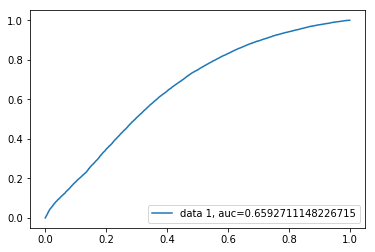

X_train_shape (100000, 27)
X_test_shape (50000, 27)
mass= 750
train mass   0.0    750.0
label              
0      49776      0
1          0  50224
test mass     0      750
label              
0      24826      0
1          0  25174
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  1.6min finished


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


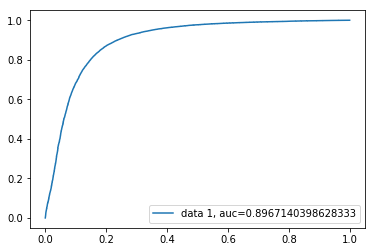

X_train_shape (100000, 27)
X_test_shape (50000, 27)
mass= 1000
train mass   0.0     1000.0
label                
0       50061       0
1           0   49939
test mass    0      1000
label              
0      25131      0
1          0  24869
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  1.2min finished


LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


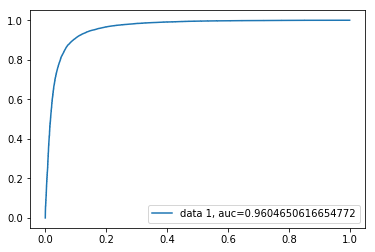

X_train_shape (100000, 27)
X_test_shape (50000, 27)
mass= 1250
train mass   0.0     1250.0
label                
0       50002       0
1           0   49998
test mass    0      1250
label              
0      25061      0
1          0  24939
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   52.9s finished


LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


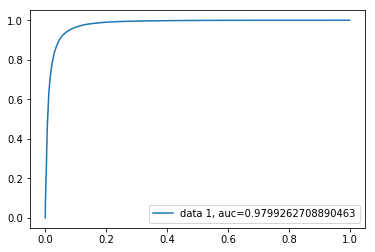

X_train_shape (100000, 27)
X_test_shape (50000, 27)
mass= 1500
train mass   0.0     1500.0
label                
0       50149       0
1           0   49851
test mass    0      1500
label              
0      25050      0
1          0  24950
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   39.3s finished


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


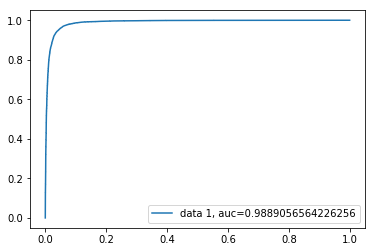

X_train_shape (100000, 27)
X_test_shape (50000, 27)


,tn,fp,fn,tp,acc,prec,recall,F1_score,kappa_cohen,auc
500,15542,9407,9652,15399,0.61882,0.620777,0.614706,0.617727,0.237652,0.659271
750,20220,4606,3669,21505,0.8345,0.823599,0.854254,0.838647,0.668898,0.896714
1000,22526,2605,2139,22730,0.90512,0.897178,0.913989,0.905506,0.810253,0.960465
1250,23167,1894,1329,23610,0.93554,0.925737,0.94671,0.936106,0.871086,0.979926
1500,23703,1347,908,24042,0.9549,0.946946,0.963607,0.955204,0.909803,0.988906


<Figure size 432x288 with 0 Axes>

In [6]:
#Metric df: 
df_metrics =  pd.DataFrame(index=[500,750,1000,1250,1500], columns=["tn", "fp", "fn", "tp", "acc", "prec","recall","F1_score","kappa_cohen","auc"])



for i in (500,750,1000,1250,1500):

    print('mass=', i )

    #train
      #0 same size of dfmass1000 #TENER EN CUENTA QUE AQUI QUE LA DE 0 SEA MAYOR SIZE ES CASUALIDAD
    #EN OTRO PICKE PODRIA SER AL REVES, ESTO SE DEBERIA DE ARREGLAR
    np.random.seed(1)
    #dfmass0['mass'] = np.random.choice([500,750,1000,1250,1500], dfmass0.shape[0])#las cambio para queno sean 0 porque entonces sabría el label
    dfmass1000=df.loc[df['mass'] ==i]        
    dfmass0=df.loc[df['mass'] == 0].sample(random_state=1,n=dfmass1000.shape[0])   #cojo todos!!!!!!!!!!!!!! 
    dfmass1000=pd.concat([dfmass1000, dfmass0]).sample(random_state=1,frac=1).reset_index(drop=True)    #concatenating and shuffling
    dfmass1000['mass']=dfmass1000['mass'].astype(float)
    dfmass1000=dfmass1000.sample(random_state=1,n=20000*5)
    print("train", pd.crosstab(dfmass1000['label'],dfmass1000['mass']))
    dfmass1000=dfmass1000.drop('mass', axis=1)        #la masa es una caracterísitca
    
    
    #test
    dfmass1000test=df_originaltest.loc[df_originaltest['mass'] == i]
    dfmass0test=df_originaltest.loc[df_originaltest['mass'] == 0].sample(random_state=1,n=dfmass1000test.shape[0])
    dfmass1000test=pd.concat([dfmass1000test, dfmass0test]).sample(frac=1).reset_index(drop=True)
    dfmass1000test=dfmass1000test.sample(random_state=1,n=10000*5)

    print("test", pd.crosstab(dfmass1000test['label'],dfmass1000test['mass']))  
    
    dfmass1000test=dfmass1000test.drop('mass', axis=1)  
    
    

    X_train=dfmass1000.drop(['label'], axis=1)
    y_train=dfmass1000.label
    
    X_test=dfmass1000test.drop(['label'], axis=1)
    y_test=dfmass1000test.label
        
   # print(X_train)
   # print(y_test)

    grid,best_model,y_pred,y_pred_proba = model(X_train,y_train,X_test)
    print(best_model)

#Roc curve construction

    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
    plt.legend(loc=4)
    #plt.savefig(cwd2+'MASS=' + str(i) + 'ROC.png')
    plt.show()
    plt.clf() 

#METRICS 

    tn, fp, fn, tp, acc, prec,recall, F1_score,kappa_cohen=Scores(y_test,y_pred)

    df_metrics.tn[i]=tn
    df_metrics.fp[i]=fp
    df_metrics.fn[i]=fn
    df_metrics.tp[i]=tp
    df_metrics.acc[i]=acc
    df_metrics.prec[i]=prec
    df_metrics.recall[i]=recall
    df_metrics.F1_score[i]=F1_score
    df_metrics.kappa_cohen[i]=kappa_cohen
    df_metrics.auc[i]=auc
    


    print("X_train_shape",X_train.shape)
    print("X_test_shape",X_test.shape)



display(df_metrics)

In [12]:
print(X_train.shape)
print(X_test.shape)
y_test.value_counts()

(100000, 27)
(50000, 27)


0    25050
1    24950
Name: label, dtype: int64

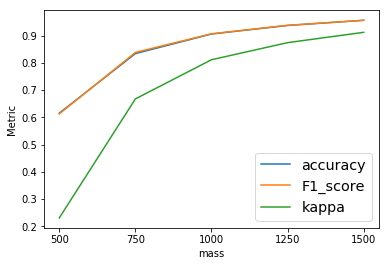

<Figure size 432x288 with 0 Axes>

In [20]:
fig, ax = plt.subplots()
ax.plot(["500","750","1000","1250","1500"], df_metrics["acc"], label="accuracy")
ax.plot(["500","750","1000","1250","1500"], df_metrics["F1_score"], label="F1_score")
ax.plot(["500","750","1000","1250","1500"], df_metrics["kappa_cohen"], label="kappa")

ax.set_xlabel('mass')
ax.set_ylabel('Metric')
legend = ax.legend(fontsize='x-large')
plt.show()
plt.savefig(cwd+ 'metrics_comparation.png')

In [21]:
df_metrics.to_pickle("resultados.pkl")